In [24]:
import numpy as np
m = 100 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 10*(x**5)+55*(x**4)+59*(x**3)-4*(x**2) - 3*x + 2 + 50*np.random.randn(m,1)

In [25]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)
print(x[:3])
print(y[:3])

<class 'numpy.ndarray'> 2 (100, 1) <class 'numpy.ndarray'> 2 (100, 1)
[[-1.01933068]
 [ 0.3250189 ]
 [ 0.6510732 ]]
[[-40.88072321]
 [ 24.92368873]
 [-40.4869506 ]]


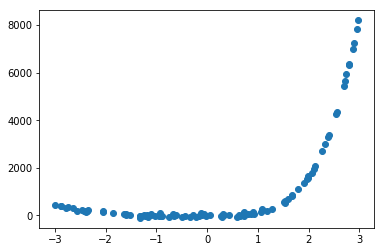

In [26]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(75, 1) (75, 1) (25, 1) (25, 1)


In [28]:
from sklearn.preprocessing import PolynomialFeatures
num_degrees = 5
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[-1.01933068] [-1.01933068  1.03903503 -1.05912028  1.07959379 -1.10046306]
(100, 1) (100, 5)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

[1076.51576715] [[895.22982719]]
Mean Squared Error on Test:  3097455.8241057964


In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

Mean Squared Error on Test:  3096760.318378053
[1076.53599871] [895.07070906]


The above two cells results in the scenario 1 which is illustrated in quiz. In the above scenario 1 we get the mse as 3097455.8241057964 without regularization and with regularisation the mse decreases to 3096760.318378053
So in this case regularzation is saving the model. This may be resulting because we are using a deterministic function of order 5 and fitting the polynomial function of same order but because of hugh noise this model might be overfitting and lasso is rescuing the model by deccreasing the error(mse) and making the model less prone to noise

In [21]:
from sklearn.preprocessing import PolynomialFeatures
num_degrees = 7
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[2.1519539] [  2.1519539    4.63090557   9.96549527  21.44528637  46.14926753
  99.31109602 213.7128999 ]
(100, 1) (100, 7)


In [22]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

[14.12301134] [[  0.61125763 -12.33002681  58.47763319  55.90494086  10.02595102]]
Mean Squared Error on Test:  4549037.49206092


In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

Mean Squared Error on Test:  4549706.500183234
[13.94682828] [ -0.         -12.19133476  58.77941349  55.89039318   9.99741025]


The above two cells results in the scenario 2 which is illustrated in quiz. In the above scenario 2 we get the mse as 4549037.49206092 without regularization and with regularisation the mse increases to 4549706.500183234
So in this case regularzation is hurting the model. This may be resulting because we are using a deterministic function of order 5 and fitting the polynomial function of order 7 and this model seems to be leaning from noise and try to fit the data and lasso is also prone to noise and is not helping to reduce the overfitting

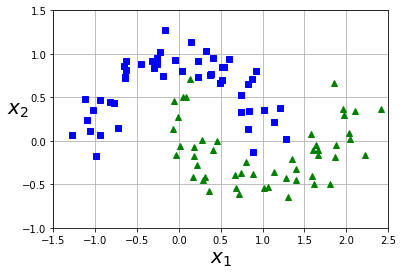

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

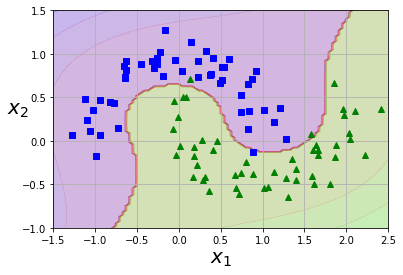

In [37]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

For the above scenario the model seems to be appropriate for the value of c=10 the model comes up with the decision boundary which seems to be a soft-margin and results in few margiin violations but seems to generalize better

In [38]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=100, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

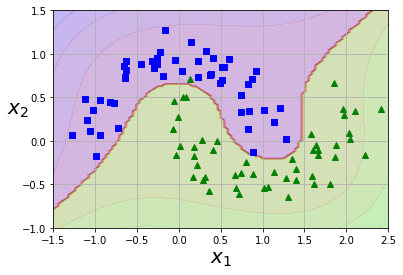

In [40]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

For the above scenario the model seems to be appropriate for the value of c=100 the model comes up with the decision boundary which seems to be a hard-margin and results in less margin violations but does not seems to generalize because of narrow street

In [41]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=0.1, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

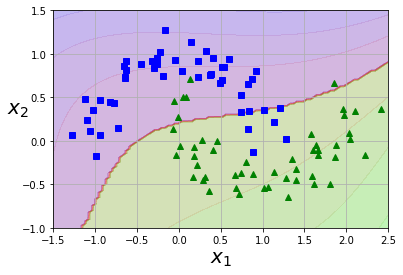

In [42]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

For the above scenario the model seems to be appropriate for the value of c=0.1 the model comes up with the decision boundary which is almost linear and results in a biased model and results in higher margin violations and does not seems to generalize because of bias and does not seems to fit a widest possible street